## Question 1: Use yfinance to Extract Stock Data

In [5]:
import yfinance as yf

In [6]:
# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

In [7]:
# Reset the index to make the 'Date' a column
tesla_data.reset_index(inplace=True)

In [8]:
# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Simulate a browser visit with headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")

# Find all tables and look for the one with 'Tesla Quarterly Revenue' in it
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Now parse that table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])

# Drop empty values and show last 5 rows
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print(tesla_revenue.tail())


         Date Revenue
0  2010-09-30      31
0  2010-06-30      28
0  2010-03-31      21
0  2009-09-30      46
0  2009-06-30      27


## Question 3: Extracting GameStop Stock Data using yfinance

In [14]:
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL and headers
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Send request and parse HTML
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")

# Prepare empty list for rows
data = []

# Look for the correct table
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    data.append({"Date": date, "Revenue": revenue})
        break

# Create DataFrame from collected rows
gme_revenue = pd.DataFrame(data)

# Display the last five rows
print(gme_revenue.tail())


          Date Revenue
60  2010-01-31    3524
61  2009-10-31    1835
62  2009-07-31    1739
63  2009-04-30    1981
64  2009-01-31    3492


## Question 5: Plot Tesla Stock Graph

Matplotlib is building the font cache; this may take a moment.


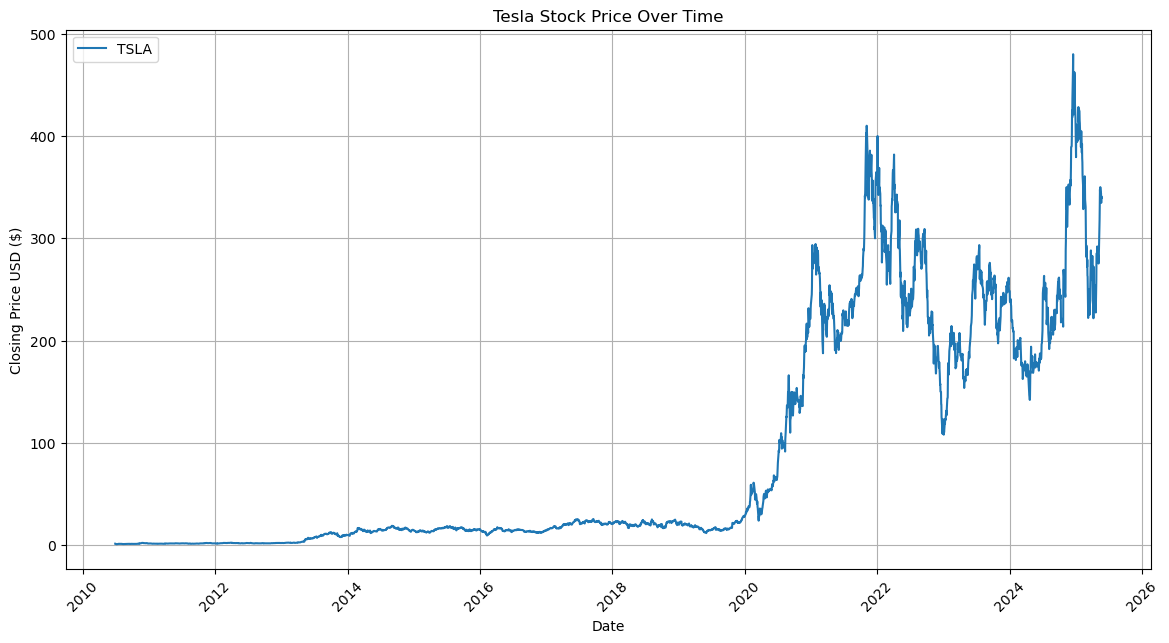

In [17]:
def make_graph(stock_data, stock, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price USD ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Make sure 'Date' is a datetime type and sorted
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data.sort_values('Date')

# Call the graph function
make_graph(tesla_data, 'TSLA', 'Tesla Stock Price Over Time')


## Question 6: Plot GameStop Stock Graph

In [20]:
def make_graph(stock_data, stock, title):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price USD ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


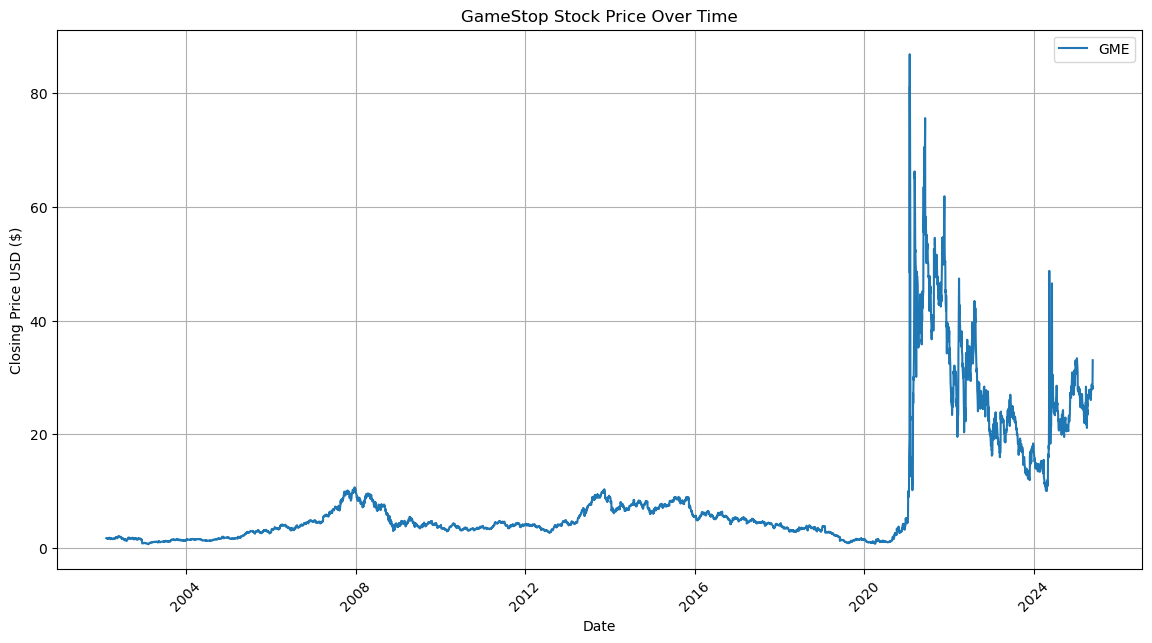

In [21]:
# Ensure 'Date' is datetime and sorted
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data = gme_data.sort_values('Date')

# Plot the GME stock graph
make_graph(gme_data, 'GME', 'GameStop Stock Price Over Time')
